In [54]:
import numpy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob
from tqdm import tqdm
import scipy.sparse as sp
from sklearn.neighbors import NearestNeighbors

In [33]:
def phash(image, hash_size=8, highfreq_factor=4):
    """
    Perceptual Hash computation.
    Implementation follows http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html
    @image must be a PIL instance.
    """
    if hash_size < 2:
        raise ValueError("Hash size must be greater than or equal to 2")

    img_size = hash_size * highfreq_factor
    image = image.convert("L").resize((img_size, img_size), Image.ANTIALIAS)
    pixels = numpy.asarray(image)
    dct = scipy.fftpack.dct(scipy.fftpack.dct(pixels, axis=0), axis=1)
    dctlowfreq = dct[:hash_size, :hash_size]
    med = numpy.median(dctlowfreq)
    diff = dctlowfreq > med
    return diff

In [111]:
def dist(a, b):
    return numpy.count_nonzero(a.flatten() != b.flatten())

In [9]:
imgs = glob("/home/ilya/Documents/vk_similarity_photos/data/images_-29341229/*.jpg")
len(imgs)

9654

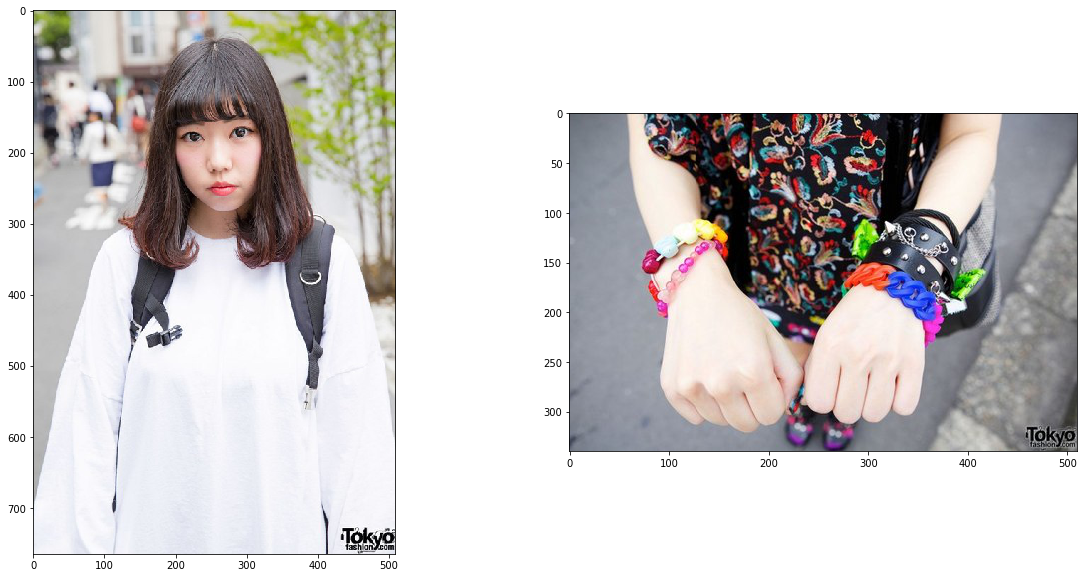

In [44]:
img1 = Image.open(imgs[-1])
img2 = Image.open(imgs[-5])
plt.figure(figsize=(20,10))
plt.axis('off')
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

24


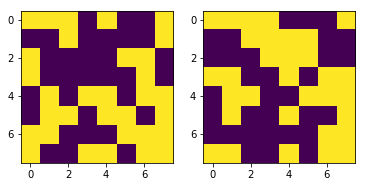

In [45]:
plt.axis('off')
plt.subplot(121)
plt.imshow(phash(img1))
plt.subplot(122)
plt.imshow(phash(img2))

print(dist(phash(img1), phash(img2)))

In [103]:
def draw(fnames, origin=None):
    if origin is not None:
        plt.imshow(Image.open(origin))
        plt.axis('off')
    plt.figure(figsize=(30, 25))
    for i in range(len(fnames)):
        f, d = fnames[i]
        try:
            img = Image.open(f)
            plt.subplot(1, 6, i + 1)
            plt.axis('off')
            plt.title("{0:.4f}".format(d))
            plt.imshow(img)
        except Exception as e:
            print(e)

In [50]:
files = glob("/home/ilya/Documents/vk_similarity_photos/data/images_-29341229/*.jpg")
n_dims = 64
vectors = sp.lil_matrix((len(files), n_dims))
for i, f in enumerate(tqdm(files)):
    img = Image.open(f)
    vectors[i, :] = phash(img).flatten()

100%|██████████| 9654/9654 [01:31<00:00, 105.96it/s]


In [164]:
def dist(a, b):
    print(a)
    return numpy.count_nonzero(a.flatten() != b.flatten())

def _similar(vec, knn, filenames, n_neighbors=6):
    dist, indices = knn.kneighbors(vec, n_neighbors=n_neighbors)
    dist, indices = dist.flatten(), indices.flatten()
    return [(filenames[indices[i]], dist[i]) for i in range(len(indices))]


def load_predictor(vecs, filenames):
    print("load predictor")
    knn = NearestNeighbors(metric='hamming', algorithm='brute')
    knn.fit(vecs)

    def similarity(vec, n_neighbors=6):
        return _similar(vec, knn, filenames, n_neighbors)

    print("Predictor loaded")
    return similarity

In [166]:
sim = load_predictor(vectors.toarray(), files)

load predictor
Predictor loaded


In [147]:
def random():
    s = vectors.shape[0]
    return vectors[np.random.randint(0, s)]

In [168]:
sim(random().toarray(), n_neighbors=3)

[('/home/ilya/Documents/vk_similarity_photos/data/images_-29341229/349899290_1419940927_GddfK829oqA.jpg',
  0.0),
 ('/home/ilya/Documents/vk_similarity_photos/data/images_-29341229/343073839_1413741734_xY-TM5JE3YY.jpg',
  0.25),
 ('/home/ilya/Documents/vk_similarity_photos/data/images_-29341229/342836611_1413539951_R7D0W5DIEas.jpg',
  0.28125)]

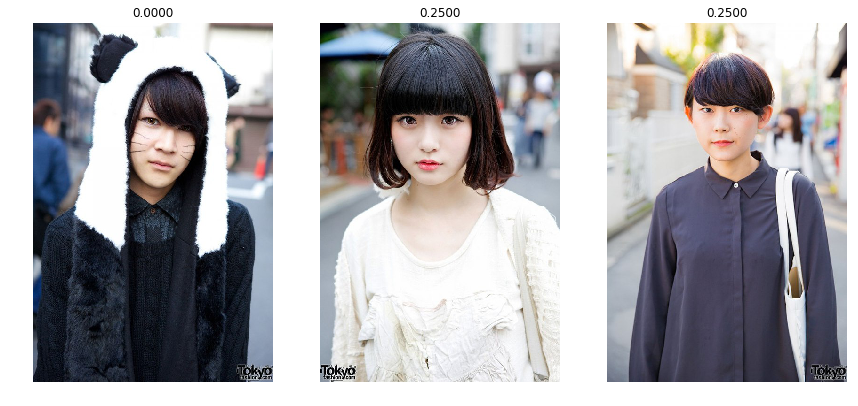

In [169]:
draw(sim(random().toarray(),n_neighbors=3))

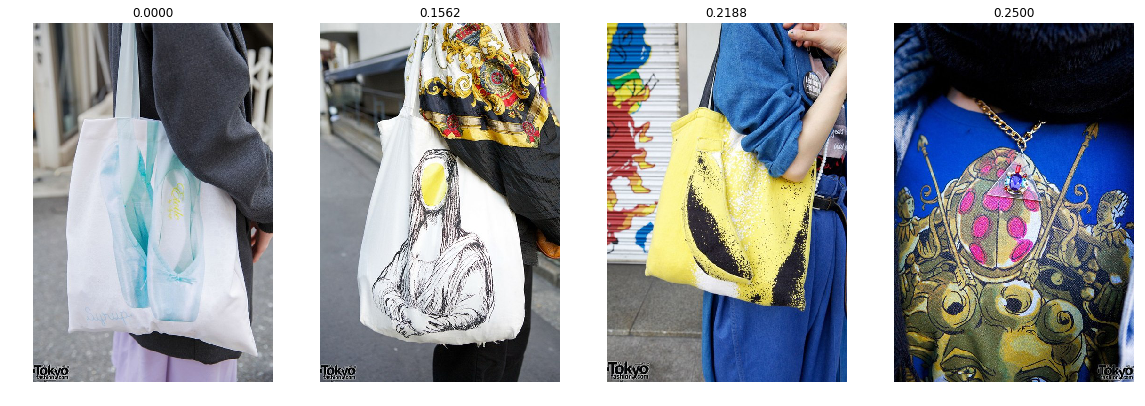

In [174]:
draw(sim(random().toarray(),n_neighbors=4))

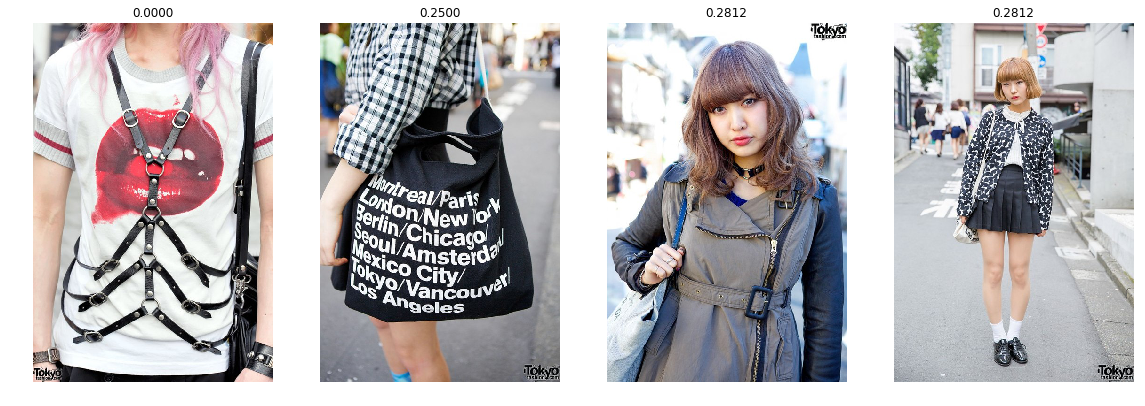

In [176]:
draw(sim(random().toarray(),n_neighbors=4))

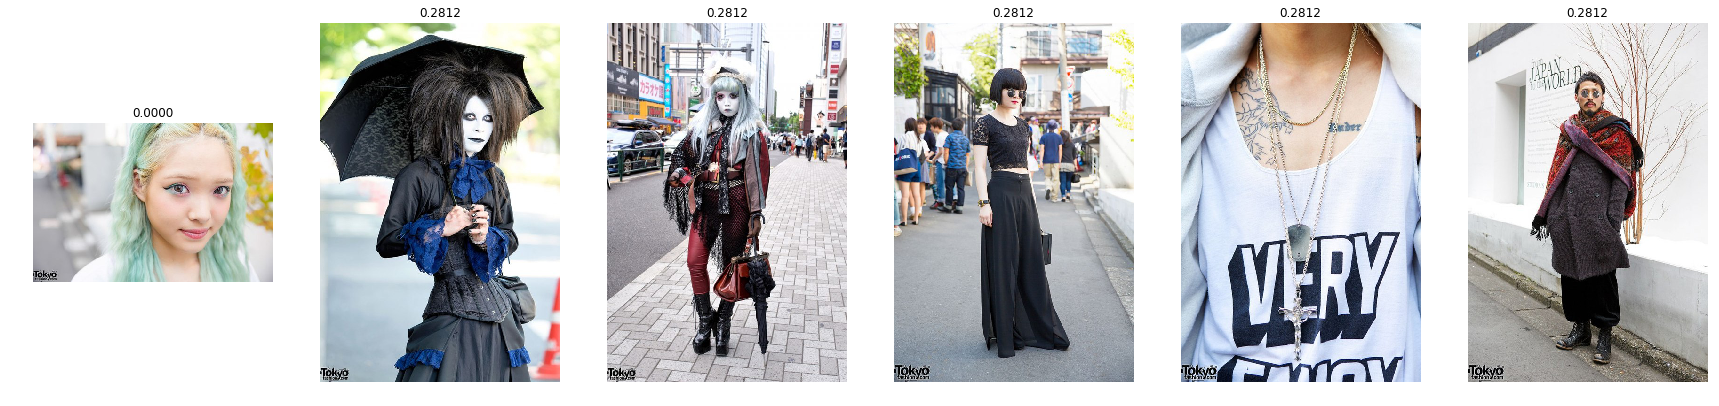

In [172]:
draw(sim(random().toarray(),n_neighbors=6))

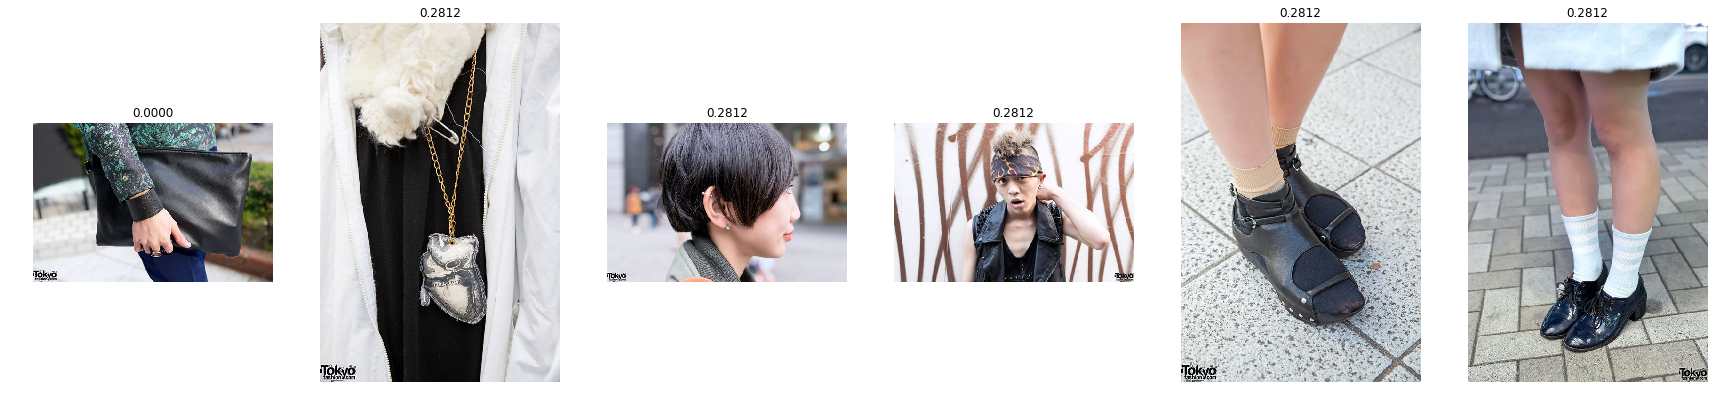

In [171]:
draw(sim(random().toarray(),n_neighbors=6))